Cooling Power: 44.04761904761905


C:\Users\Priyadharshni\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Priyadharshni\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


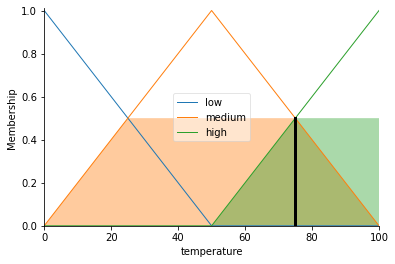

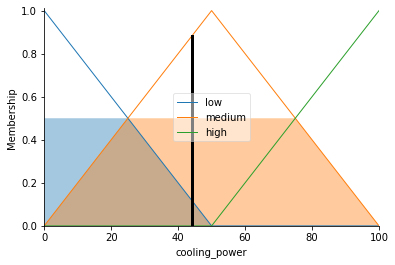

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

temperature = ctrl.Antecedent(np.arange(0, 101, 1), 'temperature')

cooling_power = ctrl.Consequent(np.arange(0, 101, 1), 'cooling_power')

temperature['low'] = fuzz.trimf(temperature.universe, [0, 0, 50])
temperature['medium'] = fuzz.trimf(temperature.universe, [0, 50, 100])
temperature['high'] = fuzz.trimf(temperature.universe, [50, 100, 100])

cooling_power['low'] = fuzz.trimf(cooling_power.universe, [0, 0, 50])
cooling_power['medium'] = fuzz.trimf(cooling_power.universe, [0, 50, 100])
cooling_power['high'] = fuzz.trimf(cooling_power.universe, [50, 100, 100])

rule1 = ctrl.Rule(temperature['low'], cooling_power['high'])
rule2 = ctrl.Rule(temperature['medium'], cooling_power['medium'])
rule3 = ctrl.Rule(temperature['high'], cooling_power['low'])

temperature_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

temperature_simulation = ctrl.ControlSystemSimulation(temperature_ctrl)

temperature_simulation.input['temperature'] = 75

temperature_simulation.compute()

print("Cooling Power:", temperature_simulation.output['cooling_power'])

temperature.view(sim=temperature_simulation)
cooling_power.view(sim=temperature_simulation)
